In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import seaborn as sns
import os

In [7]:
# Specify plot formatting options
sns.set_context('paper', font_scale=1.3)
sns.set_style('whitegrid')
sns.set_palette(['#0365C0','#E31B1C','#70BF41','#F39019','#773F9B','#85888D']) 
# custom color palette
sns.set_style({'axes.edgecolor': 'black', 'grid.color': 'black'})
plt.rc('text', usetex=False)

Here are some examples of how to plot results data generated by growth_curve_analysis.py from multiple experiments. First we need to import and compile all of the results that we want to use in the plots. Note that in order to group results for plotting, the files need to include metadata, such as that provided by a plate layout file, for each sample.

In [3]:
results_dir = '/Users/nwespe/Desktop/Plot-GROC/results/'

In [5]:
all_results = []
file_list = os.listdir(results_dir)
file_list = [f for f in file_list if f[0] != '~']
for f in file_list:
    print f
    f = os.path.join(results_dir, f) 
    data = pd.read_excel(f, converters ={'strain': lambda x: str(x), 
                                         'name': lambda x: str(x), 
                                         'expt_date': lambda x: x.strftime('%Y-%m-%d')})
    # converters keep string data in correct format
    data['sample'] = data['expt_date'] + ' ' + data['well']  # creates a unique identifier 
    results = data[['expt_date', 'sample', 'name', 'media', 'growth rate 120-360', 
                    'r-squared 120-360', 'doubling time 120-360', 'saturation time', 
                    'strain', 'clone']]
    all_results.append(results)
gc = pd.concat(all_results)
gc.to_excel(os.path.join(results_dir, 'all_results.xlsx'))  # creates file with all results

20160719 ypd nacl data_output.xlsx
20160720 ypd nacl data_output.xlsx
20160721 ypd nacl data_output.xlsx
20160727 ypd nacl data_output.xlsx
20160728 ypd nacl data_output.xlsx
20160802 ypd nacl data_output.xlsx
20160913 ypd nacl data_output.xlsx
20160922 ypd nacl data_output.xlsx
20161005 ypd nacl data_output.xlsx
20161015 ypd nacl data_output.xlsx
20161018 ypd nacl data_output.xlsx
20161019 ypd nacl data_output.xlsx


In [6]:
# once all_results file is made:
gc = pd.read_excel('/Users/nwespe/Desktop/Plot-GROC/results/all_results.xlsx')

I'm going to select a subset of the samples by name. I will first check all of the names in my results file.

In [8]:
pd.unique(gc.name)

array([u'003', u'006A', u'115', u'209', u'116', u'210', u'190', u'226',
       u'191', u'219', u'207', u'208', u'034A', u'215', u'111c3', u'255',
       u'178', u'169', u'blank', u'114', u'216', u'202', u'170', u'110-c4',
       u'248', u'112E', u'217', u'249', u'224', u'247', u'212', u'012',
       u'260', u'113A', u'229', u'227', u'228', nan, u'128', u'232',
       u'234', u'238', u'240', u'242', u'033B', u'213', u'035C', u'256A',
       u'258A', u'188', u'214', u'087', u'088', u'257', u'127', u'231',
       u'233', u'235', u'237', u'239', u'241', u'243', u'230', u'236',
       u'207B', u'129', u'130', u'028A', u'028B', u'028C', u'118A',
       u'006B', u'261', u'262'], dtype=object)

Next I will specify which strains I want to include in the plot. The first plot will be of the ancestor strains.

In [12]:
strain_list = ['006A', '006B', '028A', '028B', '028C']
group = 'all_ancestors'

Here is a boxplot of the growth rates for these strains. The results are divided into two plots based on the media type used in the experiment. 

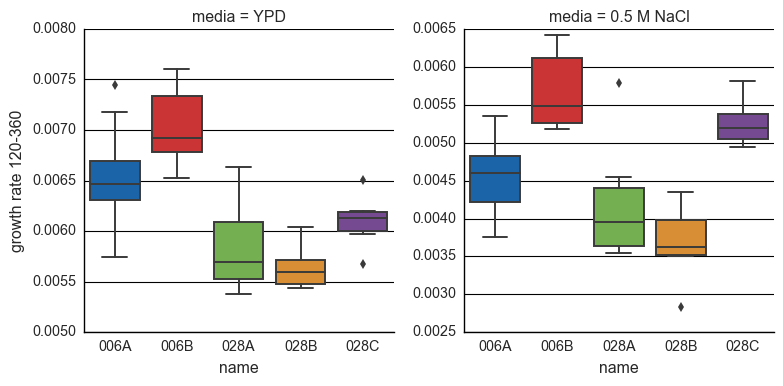

In [14]:
g = sns.factorplot(x='name', y='growth rate 120-360',
                   col='media', col_order=['YPD', '0.5 M NaCl'],
                   data=gc, order=strain_list,
                   kind='box', legend=False, sharey=False)

This plot can be customized in many ways. The version below includes custom axis labels, axis limits, titles, and a dotted line to show the wild-type growth rate. And the most important line: saving the figure. SVG format allows for easy editing in Adobe Illustrator, such as for combining multiple plots into one figure.

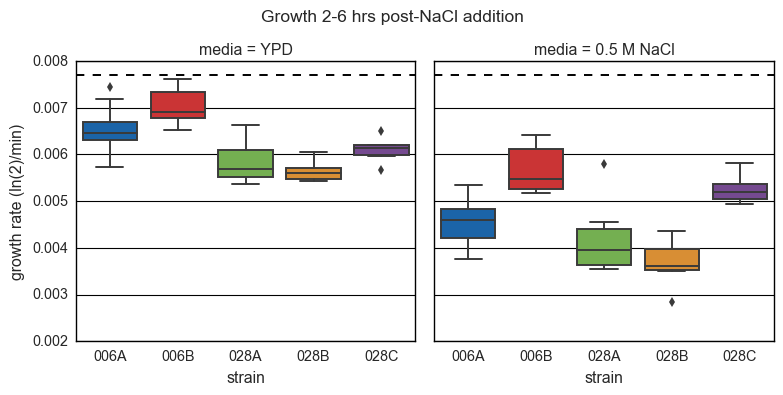

In [31]:
g = sns.factorplot(x='name', y='growth rate 120-360',
                   col='media', col_order=['YPD', '0.5 M NaCl'],
                   data=gc, order=strain_list,
                   kind='box', legend=False, sharey=True)
g.set(xlabel='strain')
g.axes[0,0].set(ylabel='growth rate (ln(2)/min)')
g.set(ylim=(0.002, 0.008))
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Growth 2-6 hrs post-NaCl addition')
g.axes[0,0].axhline(y=0.0077, ls='--', c='k')
g.axes[0,1].axhline(y=0.0077, ls='--', c='k')
sns.despine(top=False, right=False)

plt.savefig('/Users/nwespe/Desktop/Plot-GROC/'+group+'_boxplot.svg', format='svg', bbox_inches='tight')

To create boxplots for other subsets of strains, go back and edit the strain_list, then run the plotting cell again.

Any results metric can be plotted this way, such as saturation time.

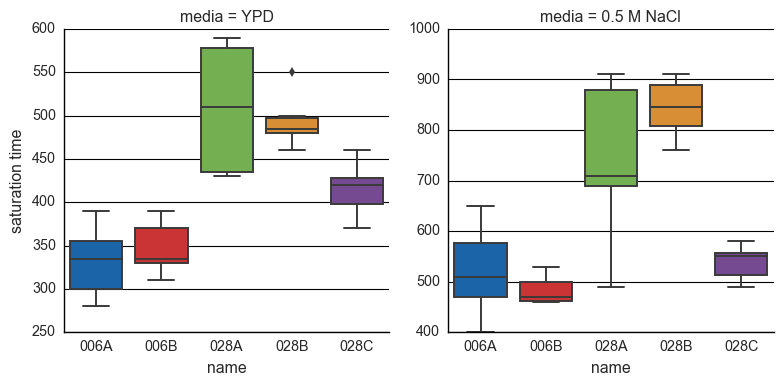

In [32]:
g = sns.factorplot(x='name', y='saturation time',
                   col='media', col_order=['YPD', '0.5 M NaCl'],
                   data=gc, order=strain_list,
                   kind='box', legend=False, sharey=False)